# Documentación: Red Bayesiana

Este notebook demuestra el uso de una red bayesiana con `pgmpy`. La red creada analiza la probabilidad de que el césped esté mojado, considerando dos variables de entrada: lluvia y activación del aspersor.

## Fundamentos Matemáticos

Una **red bayesiana** es un modelo probabilístico que representa relaciones de dependencia condicional entre variables mediante el **teorema de Bayes**. Matemáticamente, se estructura como un gráfico dirigido acíclico (DAG) donde:

- Cada **nodo** es una **variable aleatoria**.
- Cada **arista** representa una **dependencia directa** entre variables.
- Cada nodo tiene una **tabla de probabilidad condicional** (CPD), que define la probabilidad del nodo dado sus "padres" (variables de las cuales depende).

### Ejemplo de Dependencia Condicional en el Modelo

Para nuestro modelo `a -> c` y `b -> c`, tenemos:

1. **Lluvia (`a`)** y **Aspersor (`b`)** como variables independientes.
2. **Césped mojado (`c`)** depende de los valores de `a` y `b`.

En términos matemáticos, podemos expresar el modelo como:

\[
P(c, a, b) = P(a) \cdot P(b) \cdot P(c | a, b)
\]

donde:
- \( P(a) \) y \( P(b) \) son probabilidades individuales de `lluvia` y `aspersor`.
- \( P(c | a, b) \) es la probabilidad condicional de `césped mojado`, dado el estado de `lluvia` y `aspersor`.

### Inferencia en la Red Bayesiana

Para responder preguntas, como `P(c=1 | a=1, b=0)`, la red usa el **Teorema de Bayes**:

\[
P(c | a, b) = \frac{P(a, b, c)}{P(a, b)}
\]

La biblioteca `pgmpy` maneja estos cálculos usando métodos de inferencia como **eliminación de variables** o **inferencia por enumeración**.

## Ejemplos Adicionales para Aplicar el Modelo

A continuación, presentamos algunos casos adicionales que puedes probar, adaptados a diferentes contextos.

### 1. Diagnóstico Médico

- **Nodos**:
  - `Enfermedad (D)` (Sí o No)
  - `Fiebre (F)` (Sí o No)
  - `Dolor de Cabeza (H)` (Sí o No)
- **Relaciones**:
  - `D -> F`
  - `D -> H`
- **Consulta de Ejemplo**:
  - `P(D | F=1, H=1)`: Probabilidad de tener la enfermedad dado que hay fiebre y dolor de cabeza.

Este ejemplo permite inferir la probabilidad de tener una enfermedad en función de los síntomas.

### 2. Fallo en un Sistema de Red

- **Nodos**:
  - `Fallo en el Servidor (S)` (Sí o No)
  - `Fallo de Red (N)` (Sí o No)
  - `Problema de Usuario (U)` (Sí o No)
- **Relaciones**:
  - `S -> N`
  - `U -> N`
- **Consulta de Ejemplo**:
  - `P(S | N=1, U=0)`: Probabilidad de fallo en el servidor dado que hay un fallo de red y el usuario no reporta problemas.

Este modelo puede ayudar a identificar la causa probable de un fallo en un sistema de red.

### 3. Riesgo de Accidente en Carretera

- **Nodos**:
  - `Condiciones del Clima (C)` (Buenas o Malas)
  - `Tráfico (T)` (Alto o Bajo)
  - `Accidente (A)` (Sí o No)
- **Relaciones**:
  - `C -> A`
  - `T -> A`
- **Consulta de Ejemplo**:
  - `P(A | C=1, T=0)`: Probabilidad de un accidente dado que las condiciones climáticas son malas y el tráfico es bajo.

Este modelo puede ser útil para analizar el riesgo de accidentes en función de factores como el clima y el tráfico.

---

Cada ejemplo sigue la misma estructura y principios de una red bayesiana, permitiendo consultas y cálculos de probabilidades condicionadas, similares al ejemplo inicial con `lluvia`, `aspersor` y `césped mojado`.


In [3]:

# Importamos las bibliotecas necesarias
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import json
import networkx as nx
import matplotlib.pyplot as plt


In [4]:

# Función para crear una red bayesiana
def crear_red_bayesiana():
    # Crear una red bayesiana vacía
    red = BayesianNetwork()
    
    # Agregar nodos (usaremos 'a' = lluvia, 'b' = aspersor, 'c' = césped mojado)
    red.add_nodes_from(['a', 'b', 'c'])
    
    # Definir las relaciones entre los nodos
    red.add_edges_from([('a', 'c'), ('b', 'c')])

    # Definir las tablas de probabilidad condicional (CPDs)
    cpd_a = TabularCPD(variable='a', variable_card=2, values=[[0.8], [0.2]])
    cpd_b = TabularCPD(variable='b', variable_card=2, values=[[0.5], [0.5]])
    cpd_c = TabularCPD(
        variable='c', variable_card=2, 
        values=[[0.99, 0.9, 0.9, 0], [0.01, 0.1, 0.1, 1]], 
        evidence=['a', 'b'], evidence_card=[2, 2]
    )

    # Añadir CPDs a la red
    red.add_cpds(cpd_a, cpd_b, cpd_c)
    
    # Verificar la red
    if red.check_model():
        print("Red bayesiana creada exitosamente.")
    else:
        print("La red no es válida.")
    
    return red

# Función para visualizar la red
def visualizar_red(red):
    plt.figure(figsize=(8, 5))
    grafo = nx.DiGraph()
    grafo.add_edges_from(red.edges())
    nx.draw_networkx(grafo, with_labels=True, node_size=2000, font_size=10)
    plt.title("Estructura de la Red Bayesiana")
    plt.show()


Red bayesiana creada exitosamente.


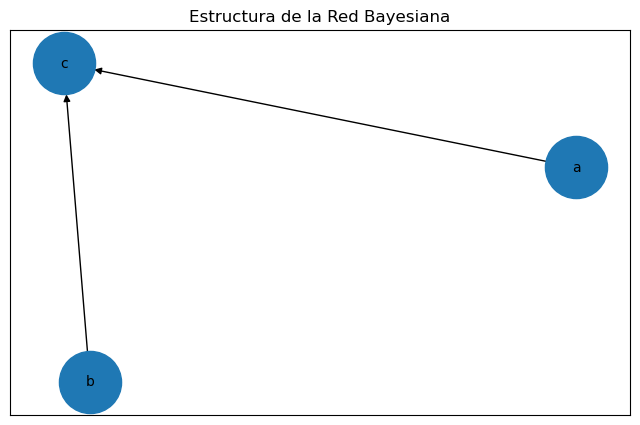

In [7]:

# Crear y visualizar la red
red = crear_red_bayesiana()
visualizar_red(red)


In [9]:

# Función para guardar la red bayesiana
def guardar_red_bayesiana(red, filename='red_bayesiana.json'):
    data = {
        "edges": list(red.edges()),
        "cpds": []
    }
    for cpd in red.get_cpds():
        cpd_data = {
            "variable": cpd.variable,
            "variable_card": int(cpd.variable_card),
            "values": cpd.get_values().tolist(),
            "evidence": list(cpd.variables[1:]),
            "evidence_card": list(map(int, cpd.cardinality[1:]))
        }
        data["cpds"].append(cpd_data)
    
    with open(filename, "w") as file:
        json.dump(data, file)
    print(f"Red bayesiana guardada en {filename}")

# Guardar la red en un archivo JSON
guardar_red_bayesiana(red)


Red bayesiana guardada en red_bayesiana.json


Red bayesiana cargada exitosamente.


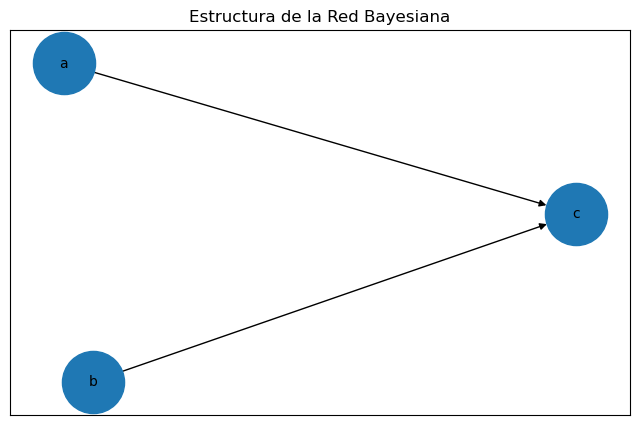

In [11]:

# Función para cargar la red bayesiana desde un archivo JSON
def cargar_red_bayesiana(filename='red_bayesiana.json'):
    with open(filename, "r") as file:
        data = json.load(file)

    red = BayesianNetwork()
    red.add_edges_from(data["edges"])
    
    cpds = []
    for cpd_data in data["cpds"]:
        cpd = TabularCPD(
            variable=cpd_data["variable"],
            variable_card=cpd_data["variable_card"],
            values=cpd_data["values"],
            evidence=cpd_data["evidence"],
            evidence_card=cpd_data["evidence_card"]
        )
        cpds.append(cpd)

    red.add_cpds(*cpds)
    if red.check_model():
        print("Red bayesiana cargada exitosamente.")
        return red
    else:
        print("La red cargada no es válida.")
        return None

# Cargar la red desde un archivo JSON y visualizarla
red_cargada = cargar_red_bayesiana()
visualizar_red(red_cargada)


In [13]:

# Función para realizar una inferencia en la red
def inferir_probabilidades(red, consulta, evidencia=None):
    infer = VariableElimination(red)
    if evidencia:
        resultado = infer.query(variables=[consulta], evidence=evidencia)
    else:
        resultado = infer.query(variables=[consulta])
    print(resultado)

# Ejemplos de inferencia
print("Consulta sin evidencia: Probabilidad de c (césped mojado)")
inferir_probabilidades(red, 'c')

print("\nConsulta con evidencia: Probabilidad de c dado que a=1 y b=0")
inferir_probabilidades(red, 'c', evidencia={'a': 1, 'b': 0})


Consulta sin evidencia: Probabilidad de c (césped mojado)
+------+----------+
| c    |   phi(c) |
+======+==========+
| c(0) |   0.8460 |
+------+----------+
| c(1) |   0.1540 |
+------+----------+

Consulta con evidencia: Probabilidad de c dado que a=1 y b=0
+------+----------+
| c    |   phi(c) |
+======+==========+
| c(0) |   0.9000 |
+------+----------+
| c(1) |   0.1000 |
+------+----------+
